<a href="https://colab.research.google.com/github/yashwanthAI-DL/Text_summary/blob/main/Text_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solution to Problem Statement
1. Based on the problem statement. Only getting sentiment or Titles wont get the exact Context for the problem
2. So to approach this problem we can use summarlization techniques which can generate a summary of the long reviews which contains the short summary of the review with context
3. To approach Summarization problem we can use different techniques like AutoSeq2Seq , Bert Summarizer etc .
4. By experiment we found that Bert summarization performs better than other tecniques
5. Preprocessing Techniques:

   a. Tried to remove punctuations but when we remove the punctuations reviews
      like 5'8 will be converted to 58. and sentenses will be converted to single sentences so making summarization bad.

   b. Tried removal of stopwords but there was no significant change in the
      summarization.
6. After Summarization is done, appended a summarization column to the original data set called Summary column


Installing Transformers

In [7]:
pip install transformers

In [8]:
pip install bert-extractive-summarizer

Importing Libraries

In [9]:
# importing libraries
import pandas as pd
import numpy as np
from summarizer import Summarizer,TransformerSummarizer

Data Reading

In [10]:
data=pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv")

In [11]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [12]:
data["Review Text"][1]

'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

In [13]:
body=data["Review Text"]

Filling null values with blank space

In [14]:
body=body.fillna("")

Optimal Sentences for BERT summarizer , Output shows 1 sentence is optimal

In [15]:
model = Summarizer()
res = model.calculate_optimal_k(body[1], k_max=10)
print(res)

1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Using Pretrained Model BERT summarizer

In [16]:
lst=[]
bert_model = Summarizer()
for i in body:
  result = bert_model(i, num_sentences=1)
  lst.append(result)

Ouput Stored in List

In [17]:
lst

['Absolutely wonderful - silky and sexy and comfortable',
 "i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.",
 'I had such high hopes for this dress and really wanted it to work for me.',
 'every time i wear it, i get nothing but great compliments!',
 'This shirt is very flattering to all due to the adjustable front tie.',
 'I love tracy reese dresses, but this one is not for the very petite.',
 'I aded this in my basket at hte last mintue to see what it would look like in person. (',
 'I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants).',
 'i usually get an xs but it runs a little snug in bust so i ordered up a size.',
 "i ordered the s petite to make sure the length wasn't too long.",
 'Dress runs small esp where the zipper area runs.',
 '',
 'More and more i find myself reliant on the reviews written by savvy shoppers before me and for the m

Word Cloud of Summarized Reviews

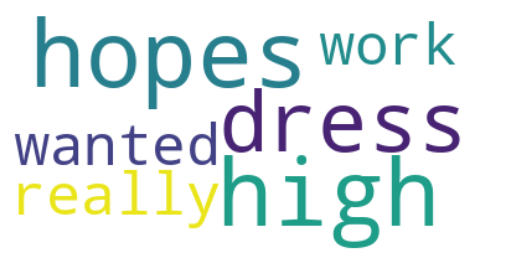

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(lst[2])
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
data["Summary"]=lst

In [22]:
data.shape

(23486, 12)

Saving File as Excel format for further download


In [24]:
file_name = 'Review_summary.xlsx'

# saving the excel
data.to_excel(file_name)

In [139]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Summary
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"i happened to find it in a store, and i'm glad..."
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"every time i wear it, i get nothing but great ..."
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,This shirt is very flattering to all due to th...
